# Brain Tumor Detector

### Installing YOLOv5

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 14906, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 14906 (delta 11), reused 12 (delta 2), pack-reused 14880
Receiving objects: 100% (14906/14906), 13.92 MiB | 18.96 MiB/s, done.
Resolving deltas: 100% (10258/10258), done.
/workspace/yolov5
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Setup complete. Using torch 1.13.1+cu116 (NVIDIA A100 80GB PCIe)


### Loading the Dataset
Dataset used: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection<br>
Annotations done by me

In [9]:
%pip install roboflow
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="ultralytics")

os.environ["DATASET_DIRECTORY"] = "/workspace/datasets"

upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=yolov5&ref=ultralytics


In [12]:
with open("/workspace/key.txt", "r") as key:
    api_key = key.read()
    rf = Roboflow(api_key=api_key)
    project = rf.workspace("dhanush-ekollu").project("brain-tumor-detector-0wv25")
    dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /workspace/datasets/Brain-Tumor-Detector-1 in yolov5pytorch:: 100%|██████████| 468/468 [00:00<00:00, 6604.76it/s]


### Training the Model

In [8]:
!python train.py --img 640 --batch 16 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/workspace/datasets/Brain-Tumor-Detector-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-53-g65071da Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100 80GB PCIe, 81105MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4

### Testing the Model

In [14]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/workspace/datasets/Brain-Tumor-Detector-1/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-53-g65071da Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100 80GB PCIe, 81105MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/22 /workspace/datasets/Brain-Tumor-Detector-1/test/images/43-no_jpg.rf.2f0dcf95f2c9869589c2e4da5eca47d7.jpg: 640x640 (no detections), 6.8ms
image 2/22 /workspace/datasets/Brain-Tumor-Detector-1/test/images/47-no_jpg.rf.cd29a9df7f86d2ae427dc31e6eb146b9.jpg: 640x640 (no detections), 7.2ms
imag

### Seeing the result

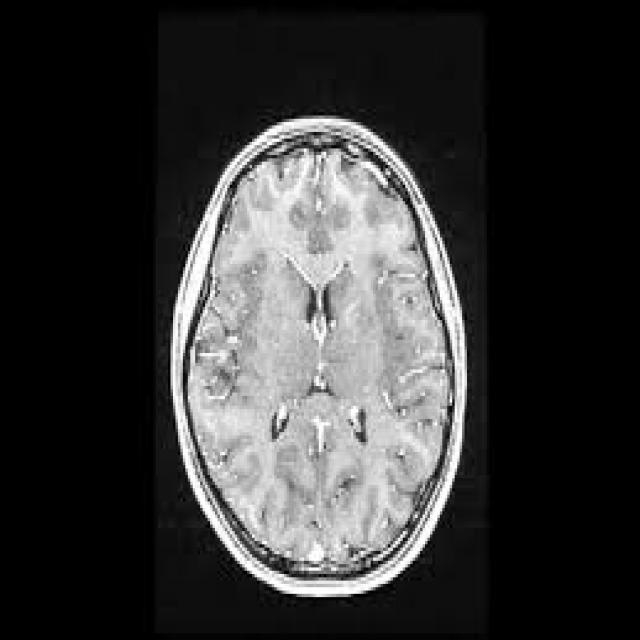

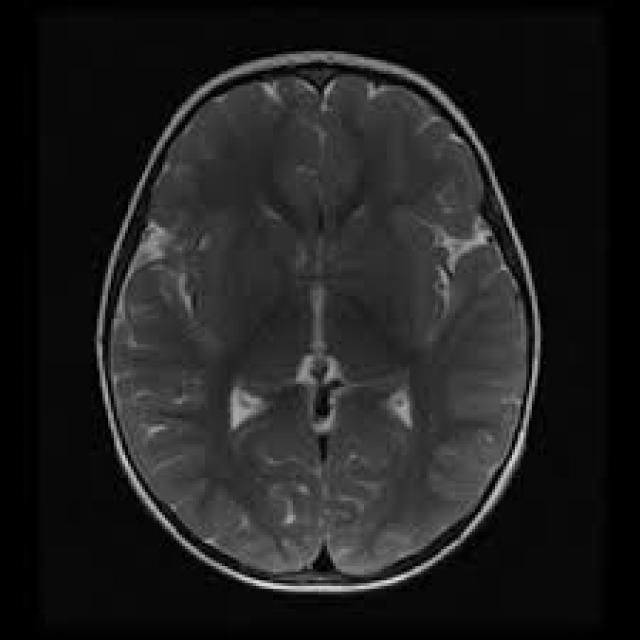

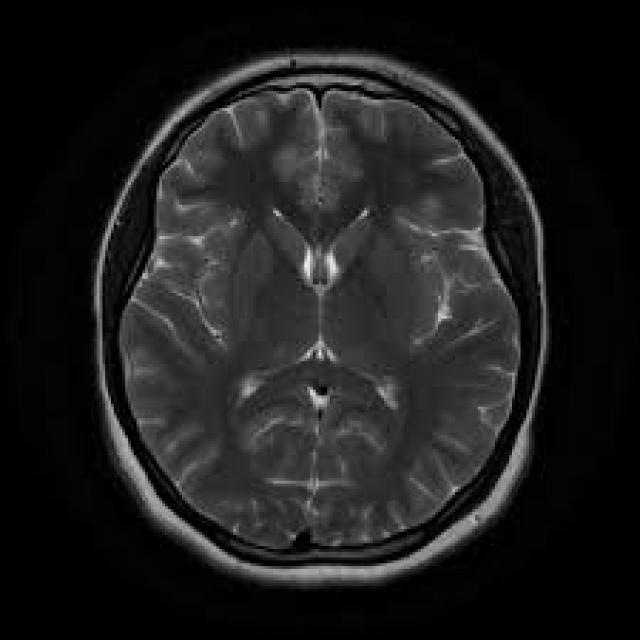

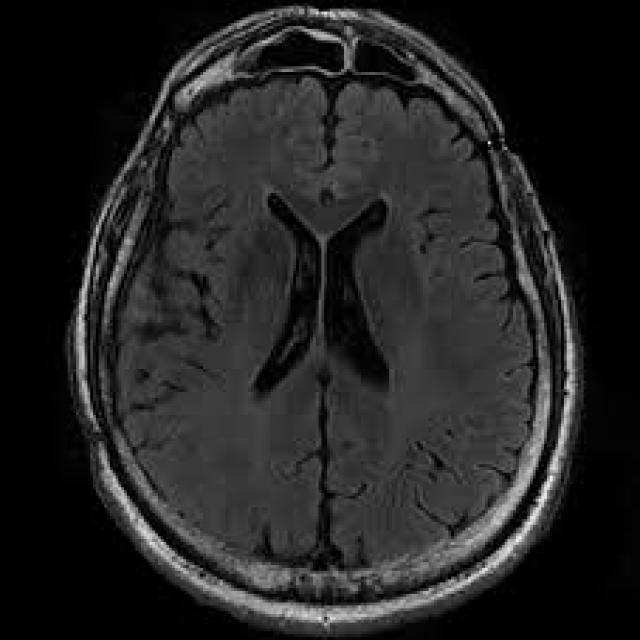

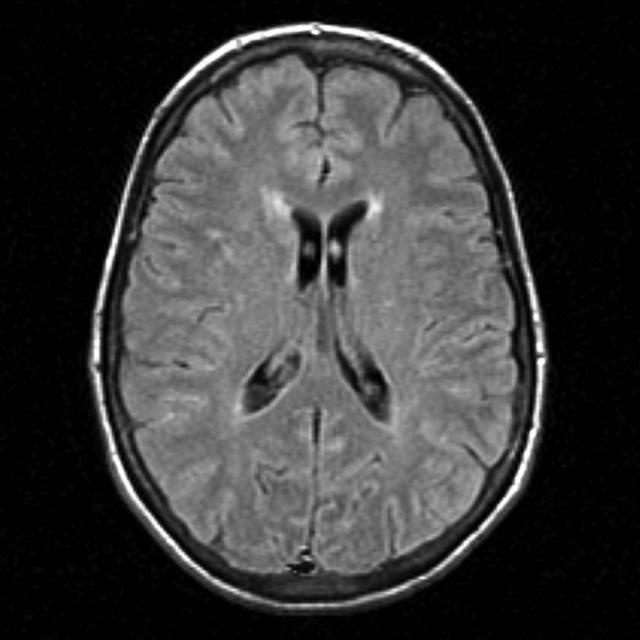

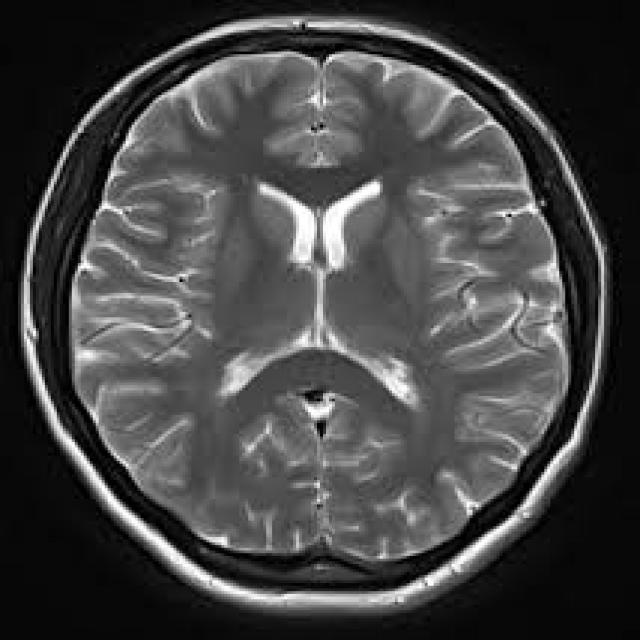

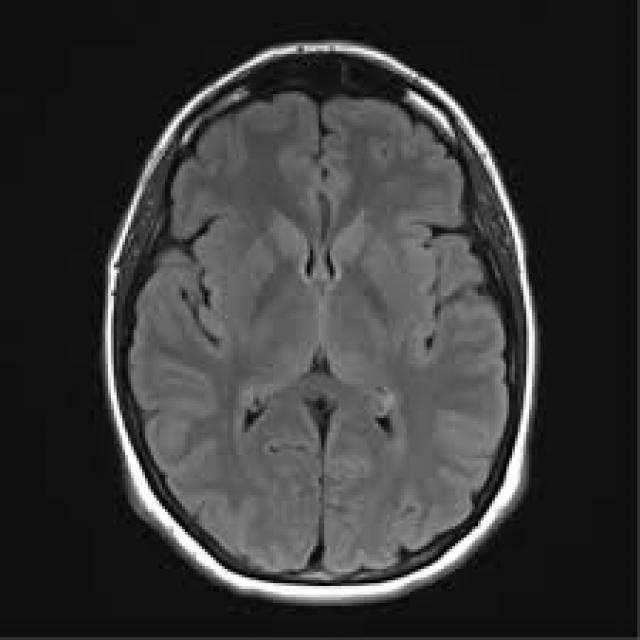

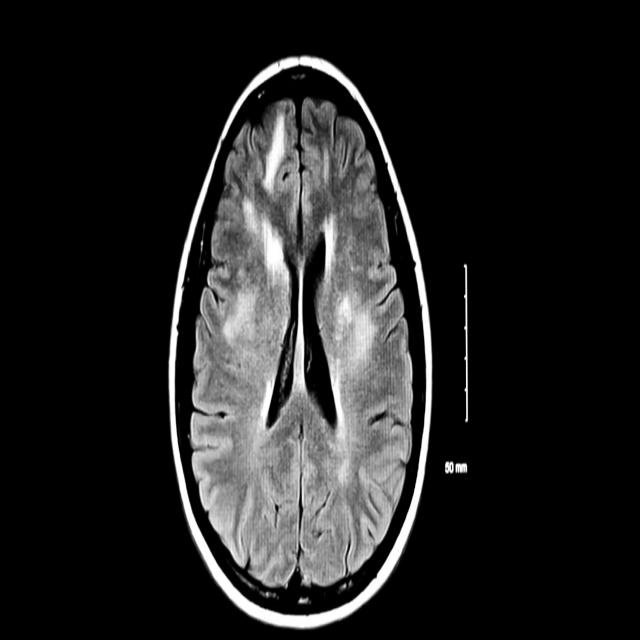

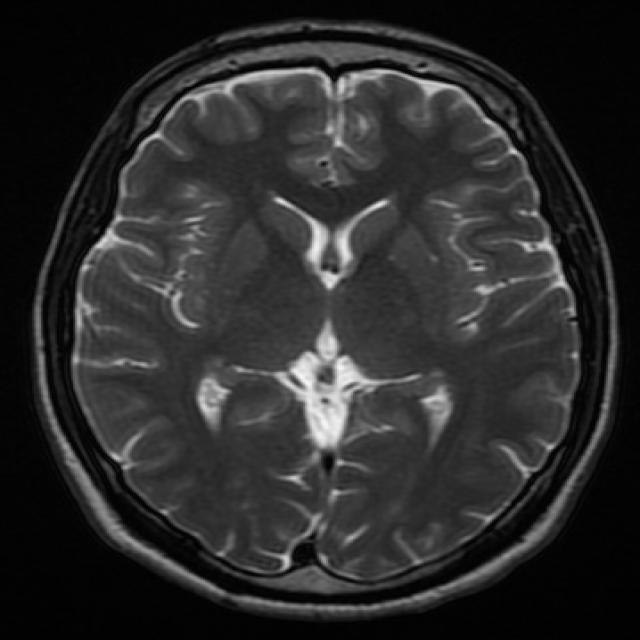

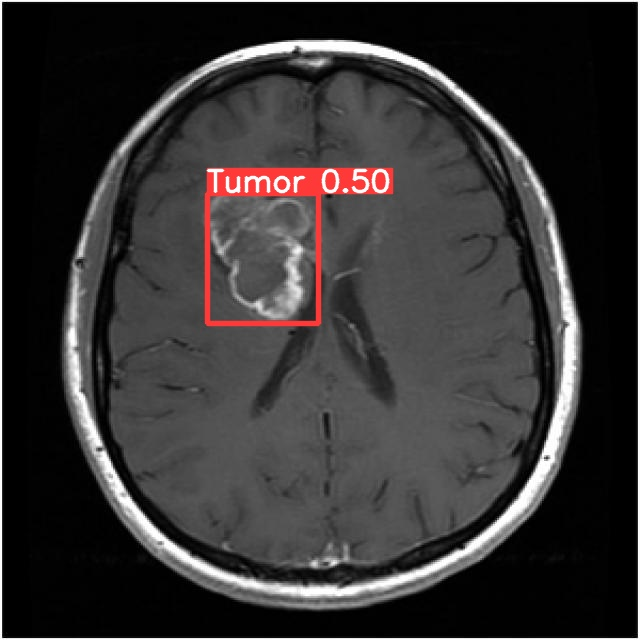

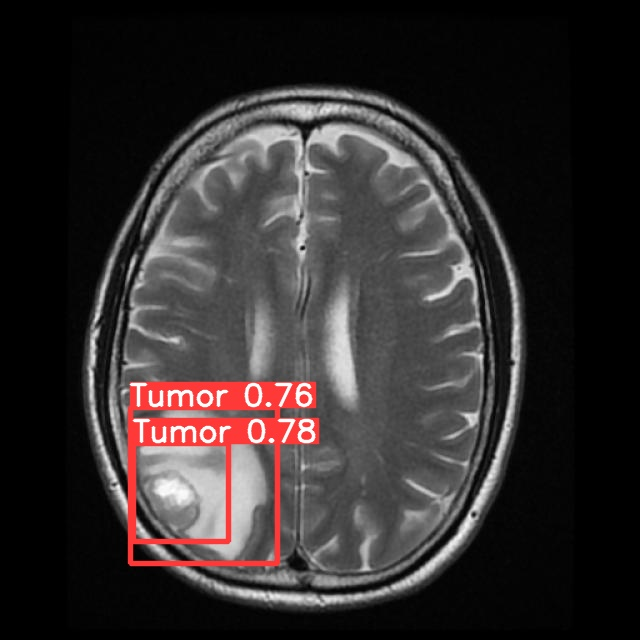

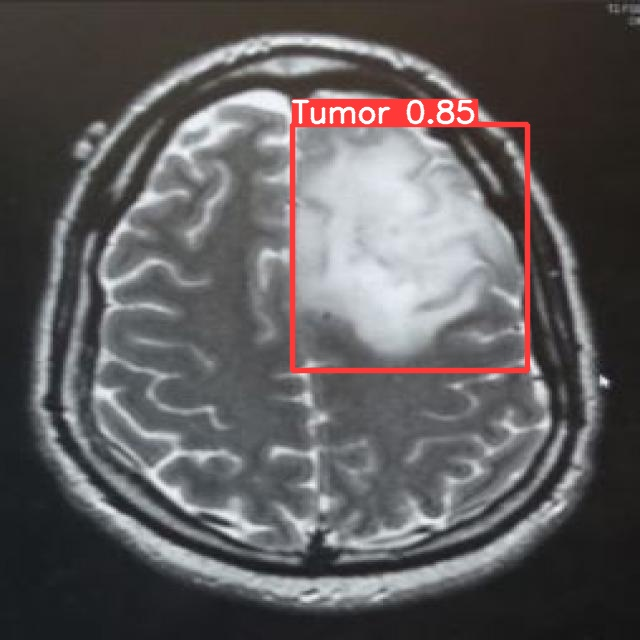

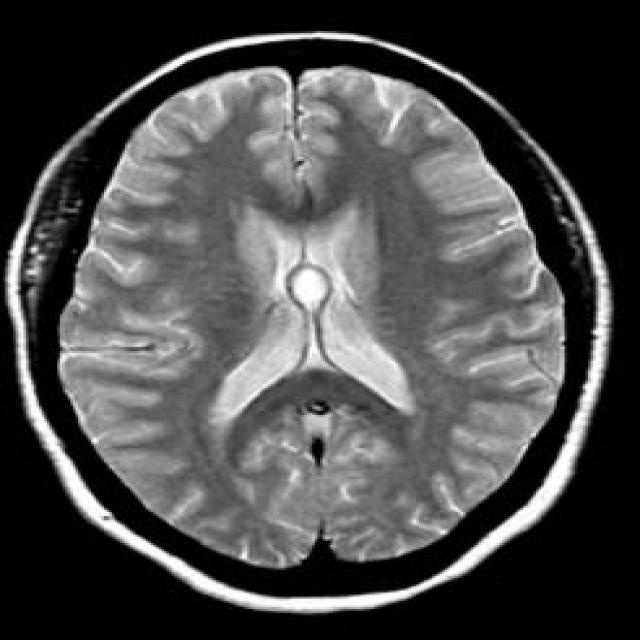

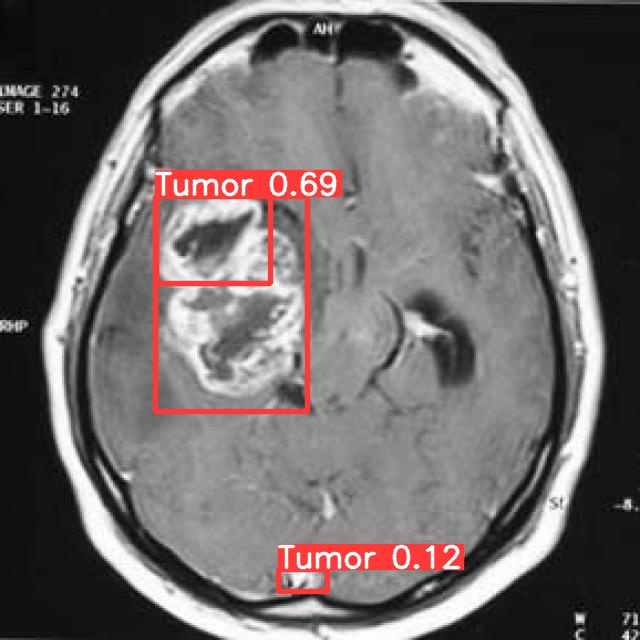

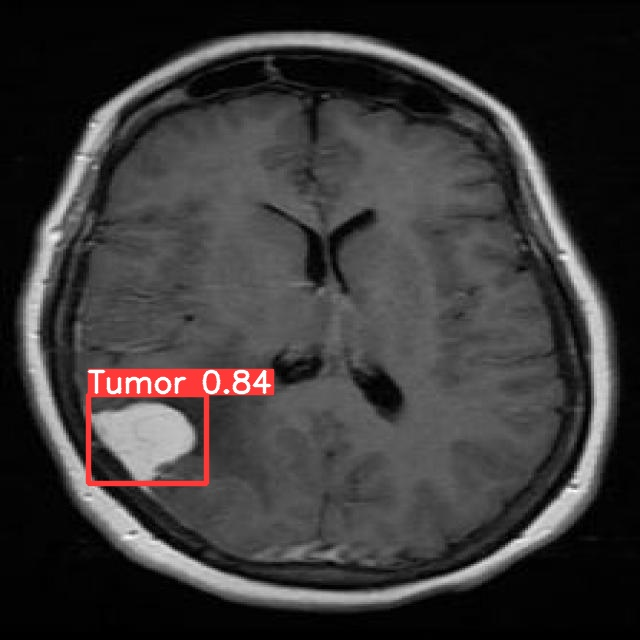

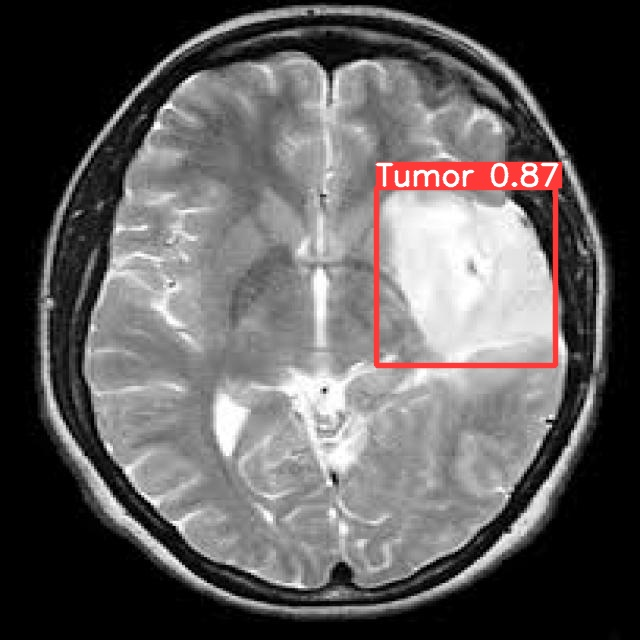

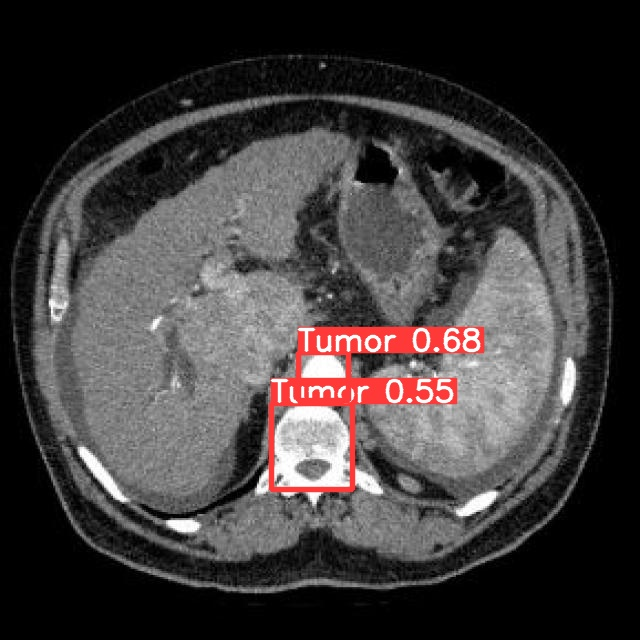

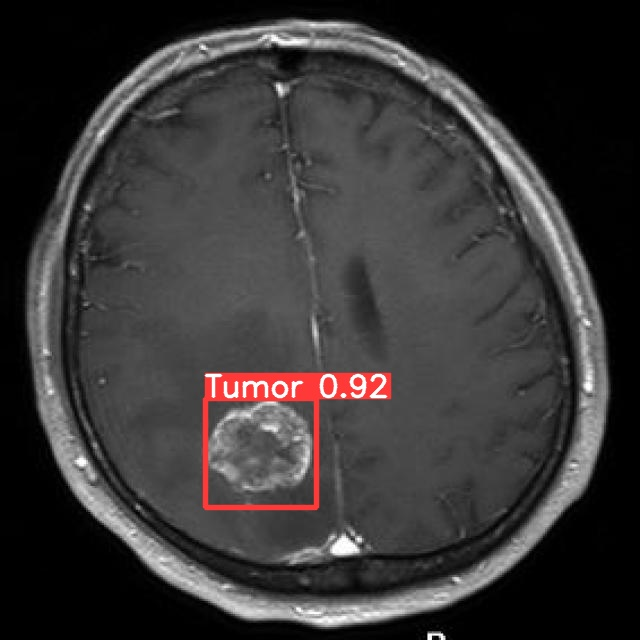

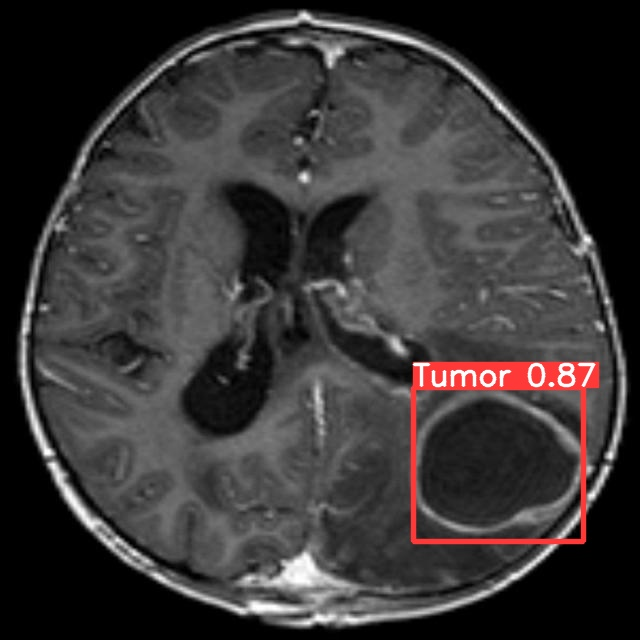

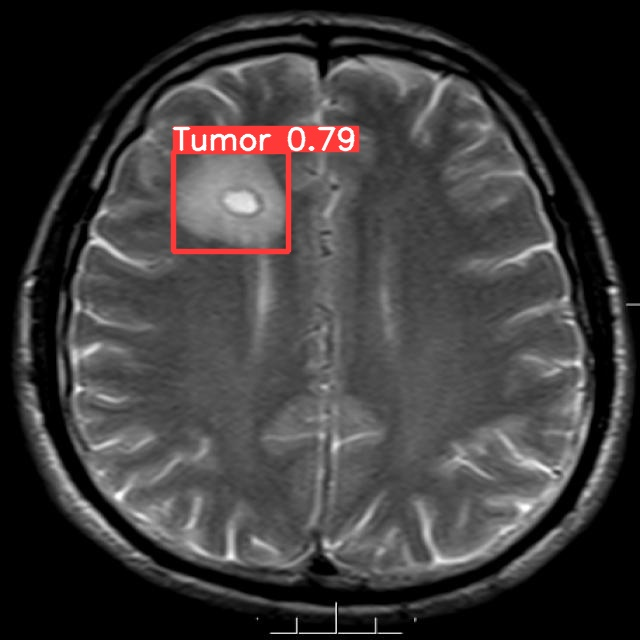

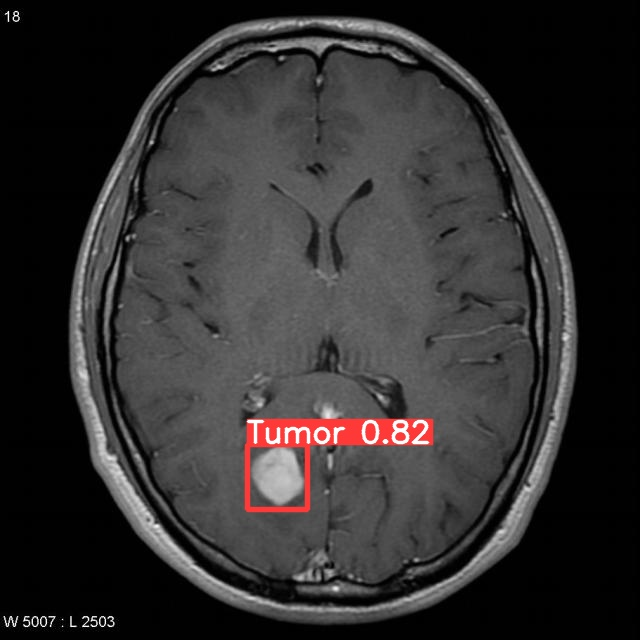

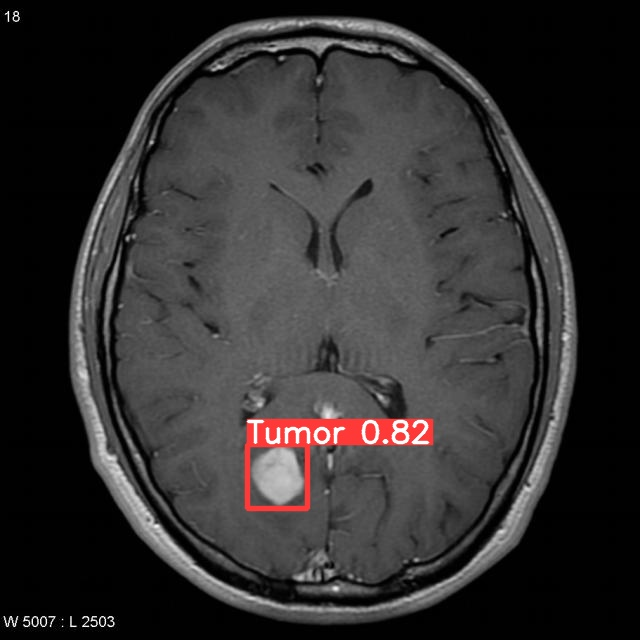

In [6]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('C:\\Users\\Dhanush\\Desktop\\My Stuff\\Coding\\Python\\Brain-Tumor-Detector\\yolov5\\runs\\detect\\exp\\*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")